In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('customer_dataset.csv')
df.head(5)

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


In [4]:
df.shape

(10108, 15)

In [5]:
def uni(col):
    return df[col].unique()

columns = ['Marital_Status', 'Education_Level', 'contact', 'Customer_Job']

for col in columns:
    print(f"{col} :", uni(col))

Marital_Status : ['Single' 'Married' 'Unknown']
Education_Level : ['Uneducated' 'Unknown' 'Graduate' 'High School' 'Post-Graduate'
 'Doctorate']
contact : ['unknown' 'cellular' 'telephone']
Customer_Job : ['Businessman' 'Selfemployeed' 'Blue-collar' 'Retirees' 'White-collar'
 'Govt']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Client_Num               10108 non-null  int64 
 1   Customer_Age             10108 non-null  int64 
 2   Gender                   10108 non-null  object
 3   Dependent_Count          10108 non-null  int64 
 4   Education_Level          10108 non-null  object
 5   Marital_Status           10108 non-null  object
 6   state_cd                 10108 non-null  object
 7   Zipcode                  10108 non-null  int64 
 8   Car_Owner                10108 non-null  object
 9   House_Owner              10108 non-null  object
 10  Personal_loan            10108 non-null  object
 11  contact                  10108 non-null  object
 12  Customer_Job             10108 non-null  object
 13  Income                   10108 non-null  int64 
 14  Cust_Satisfaction_Score  10108 non-nul

In [7]:
df.isnull().sum() / len(df) * 100

Client_Num                 0.0
Customer_Age               0.0
Gender                     0.0
Dependent_Count            0.0
Education_Level            0.0
Marital_Status             0.0
state_cd                   0.0
Zipcode                    0.0
Car_Owner                  0.0
House_Owner                0.0
Personal_loan              0.0
contact                    0.0
Customer_Job               0.0
Income                     0.0
Cust_Satisfaction_Score    0.0
dtype: float64

In [71]:
round(df.describe(),2)

,Client_Num,Customer_Age,Dependent_Count,Zipcode,Income,Cust_Satisfaction_Score
count,1.010800e+04,10108.00,10108.00,10108.00,10108.00,10108.00
mean,7.390104e+08,46.27,2.35,91663.07,56976.10,3.19
std,3.673623e+07,8.09,1.30,1693.09,46183.72,1.26
min,7.080821e+08,21.00,0.00,53010.00,1250.00,1.00
25%,7.130267e+08,41.00,1.00,91750.00,22635.75,2.00
50%,7.179037e+08,46.00,2.00,91750.00,44768.50,3.00
75%,7.727989e+08,52.00,3.00,91750.00,76392.75,4.00
max,8.278908e+08,73.00,5.00,99504.00,239791.00,5.00


In [53]:
round(df.groupby('Customer_Job')['Cust_Satisfaction_Score'].mean().sort_values(ascending=False),2)

Customer_Job
Businessman      3.23
Govt             3.22
Selfemployeed    3.22
Retirees         3.17
Blue-collar      3.17
White-collar     3.10
Name: Cust_Satisfaction_Score, dtype: float64

In [57]:
round(df.groupby('Education_Level')['Income'].mean().sort_values(ascending=False),2)

Education_Level
Unknown          58040.56
High School      57771.66
Uneducated       57364.83
Post-Graduate    56640.68
Graduate         56254.14
Doctorate        55579.79
Name: Income, dtype: float64

In [54]:
round(df.groupby('Education_Level')['Cust_Satisfaction_Score'].mean().sort_values(ascending=False),2)

Education_Level
High School      3.24
Unknown          3.21
Uneducated       3.19
Graduate         3.17
Post-Graduate    3.15
Doctorate        3.13
Name: Cust_Satisfaction_Score, dtype: float64

<Axes: xlabel='Customer_Age', ylabel='Count'>

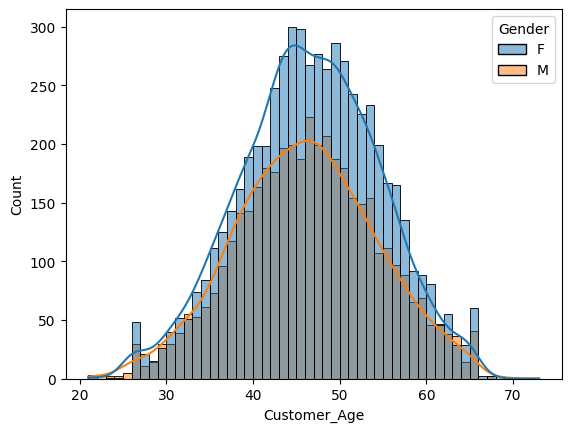

In [15]:
sns.histplot(data=df, x='Customer_Age',kde=True, hue='Gender')

<Axes: xlabel='Income', ylabel='Customer_Age'>

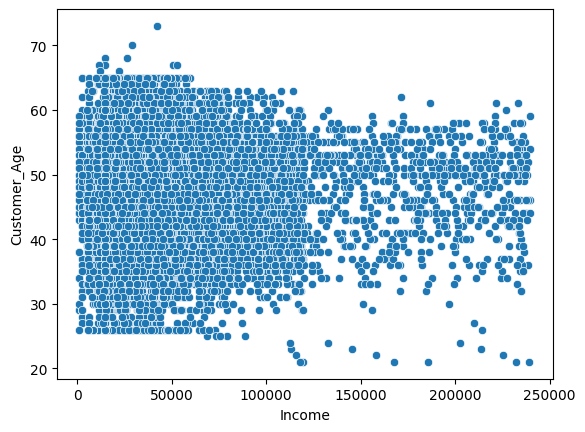

In [69]:
sns.scatterplot(data=df, x='Income', y='Customer_Age')

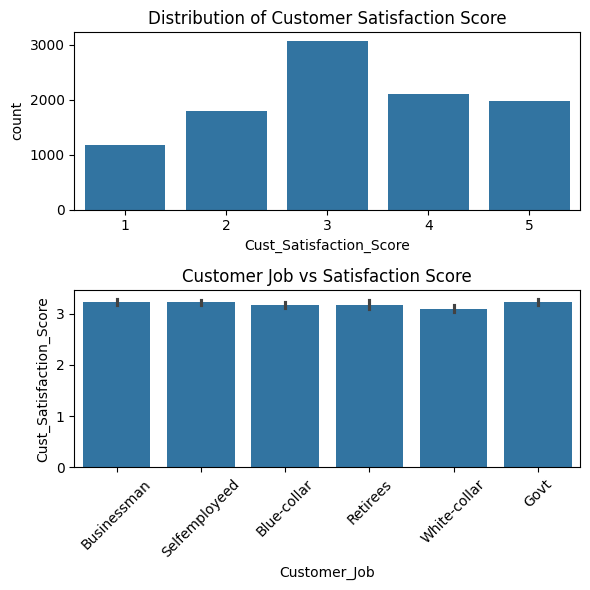

In [76]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6))

sns.countplot(data=df, x='Cust_Satisfaction_Score', ax=axes[0])
axes[0].set_title('Distribution of Customer Satisfaction Score')


sns.barplot(data=df, x='Customer_Job', y='Cust_Satisfaction_Score', ax=axes[1])
axes[1].set_title('Customer Job vs Satisfaction Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

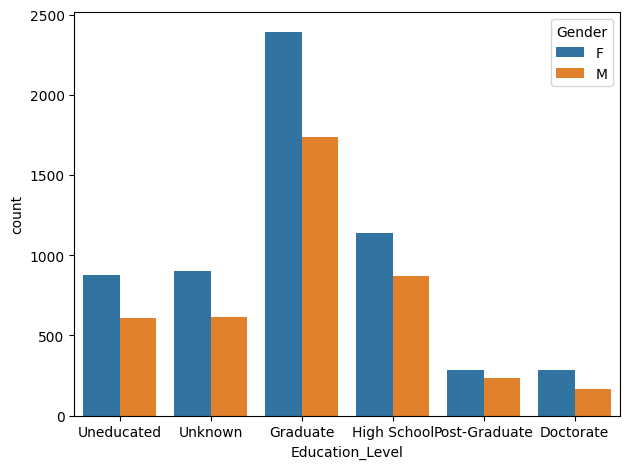

In [18]:
sns.countplot(data=df, x='Education_Level', hue='Gender')
plt.tight_layout()
plt.show()

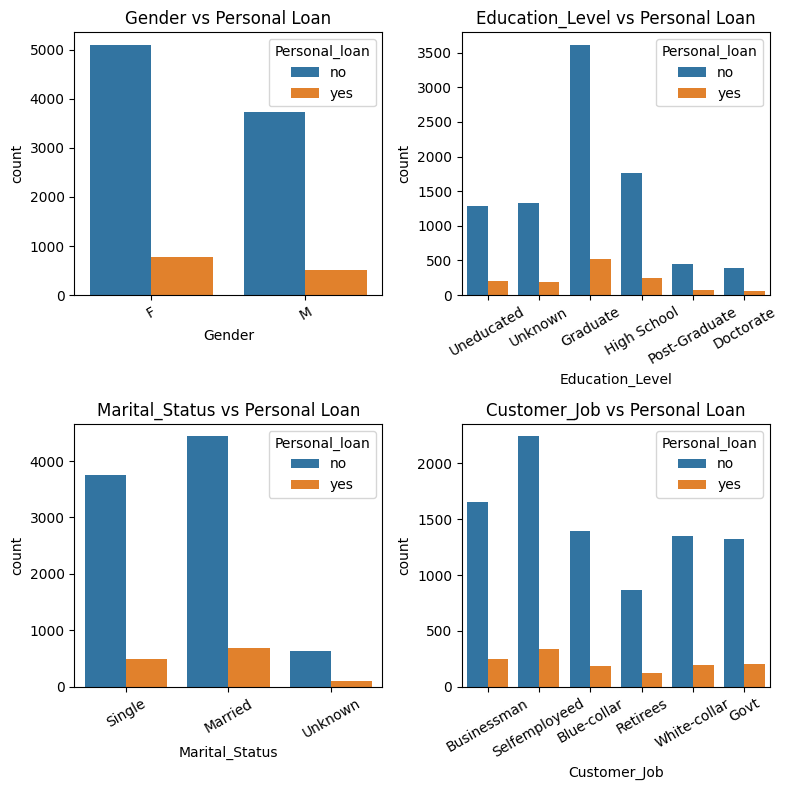

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  
axes = axes.flatten()

columns = ['Gender', 'Education_Level', 'Marital_Status', 'Customer_Job']

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, hue='Personal_loan', ax=axes[i])
    axes[i].set_title(f'{col} vs Personal Loan')
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

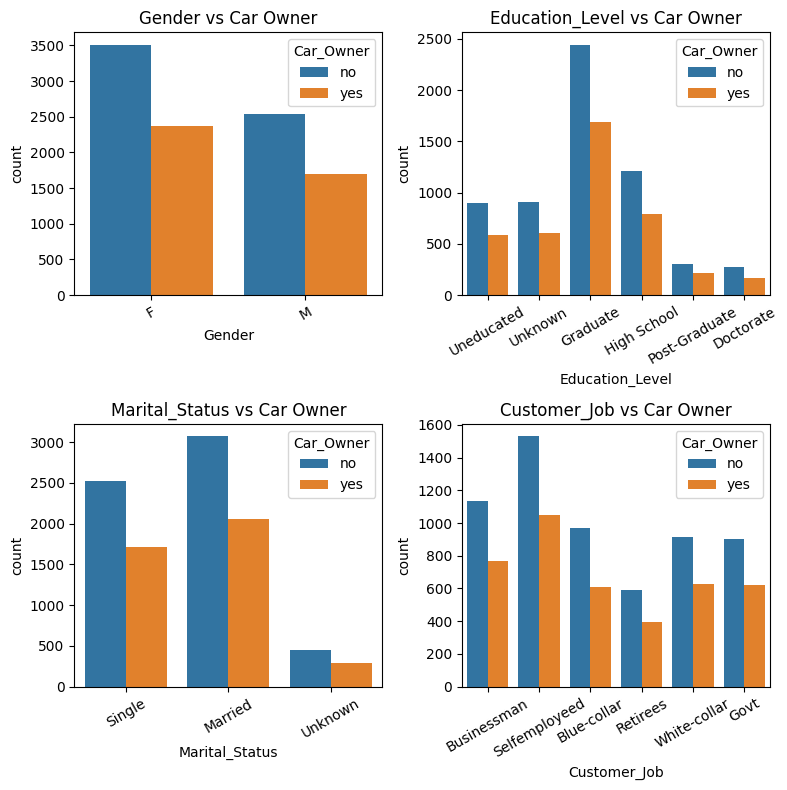

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  
axes = axes.flatten()

columns = ['Gender', 'Education_Level', 'Marital_Status', 'Customer_Job']

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, hue='Car_Owner', ax=axes[i])
    axes[i].set_title(f'{col} vs Car Owner')
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

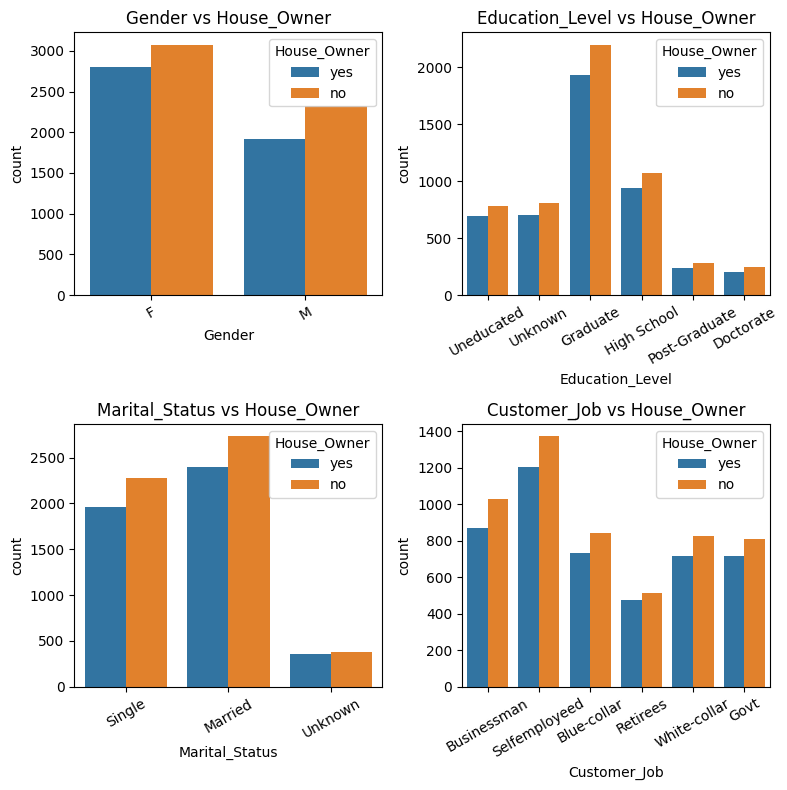

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  
axes = axes.flatten()

columns = ['Gender', 'Education_Level', 'Marital_Status', 'Customer_Job']

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, hue='House_Owner', ax=axes[i])
    axes[i].set_title(f'{col} vs House_Owner')
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

C:\Users\Aryan\AppData\Local\Temp\ipykernel_16764\1125408940.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=60, ha='right')


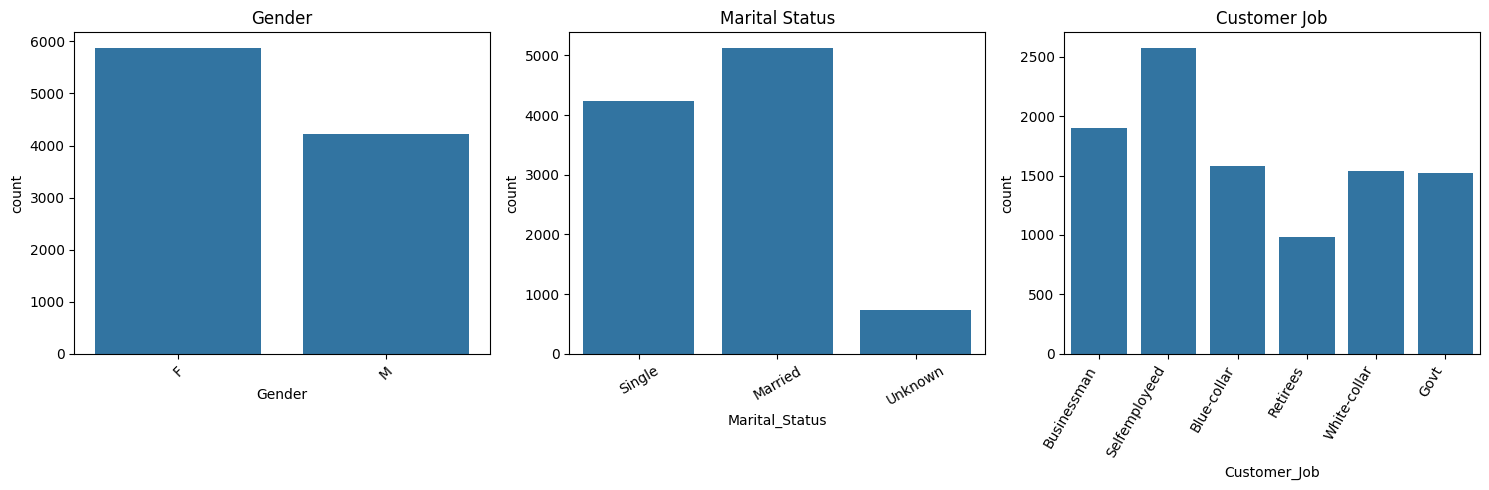

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(data=df, x='Gender', ax=axes[0])
axes[0].set_title('Gender')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='Marital_Status', ax=axes[1]) 
axes[1].set_title('Marital Status')
axes[1].tick_params(axis='x', rotation=30)

sns.countplot(data=df, x='Customer_Job', ax=axes[2])
axes[2].set_title('Customer Job')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=60, ha='right')

plt.tight_layout()
plt.show()

C:\Users\Aryan\AppData\Local\Temp\ipykernel_16764\2731295331.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


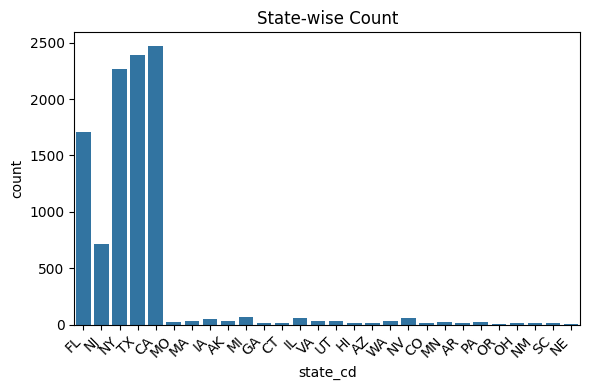

In [10]:
plt.figure(figsize=(6, 4)) 
ax = sns.countplot(data=df, x='state_cd')
ax.set_title('State-wise Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Axes: >

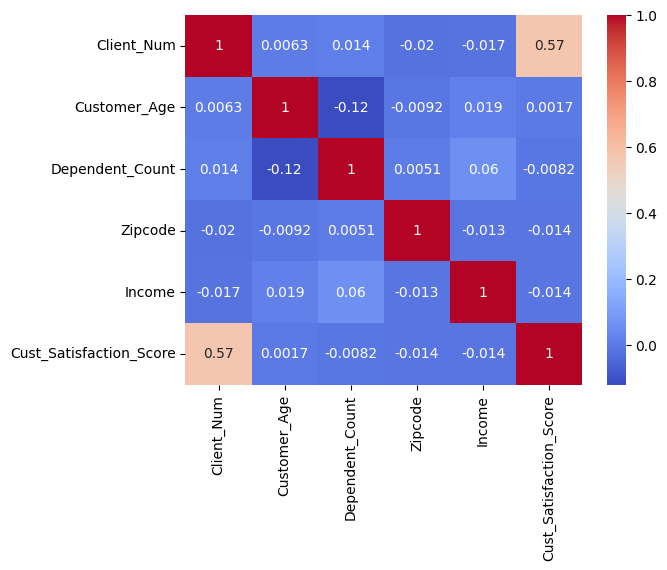

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')